In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('/content/fb_price.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [3]:
df = df[['Date', 'Adj Close']]

In [4]:
df.rename(columns = {'Date': 'date', 'Adj Close': 'price_t'}, inplace = True)
df.head()

,date,price_t
0,2012-05-18,38.230000
1,2012-05-21,34.029999
2,2012-05-22,31.000000
3,2012-05-23,32.000000
4,2012-05-24,33.029999


In [6]:
df['price_t-1'] = df['price_t'].shift(1)
df.head()

,date,price_t,price_t-1
0,2012-05-18,38.230000,NaN
1,2012-05-21,34.029999,38.230000
2,2012-05-22,31.000000,34.029999
3,2012-05-23,32.000000,31.000000
4,2012-05-24,33.029999,32.000000


In [7]:
df['returns_manual'] = ( df['price_t'] / df['price_t-1'] ) - 1
df.head()

,date,price_t,price_t-1,returns_manual
0,2012-05-18,38.230000,NaN,NaN
1,2012-05-21,34.029999,38.230000,-0.109861
2,2012-05-22,31.000000,34.029999,-0.089039
3,2012-05-23,32.000000,31.000000,0.032258
4,2012-05-24,33.029999,32.000000,0.032187


In [8]:
df['returns_pct_change_method'] = df['price_t'].pct_change(1)
df.head()

,date,price_t,price_t-1,returns_manual,returns_pct_change_method
0,2012-05-18,38.230000,NaN,NaN,NaN
1,2012-05-21,34.029999,38.230000,-0.109861,-0.109861
2,2012-05-22,31.000000,34.029999,-0.089039,-0.089039
3,2012-05-23,32.000000,31.000000,0.032258,0.032258
4,2012-05-24,33.029999,32.000000,0.032187,0.032187


In [9]:
df['returns'] = df['price_t'] / df['price_t'].shift(1) - 1
df.head()

,date,price_t,price_t-1,returns_manual,returns_pct_change_method,returns
0,2012-05-18,38.230000,NaN,NaN,NaN,NaN
1,2012-05-21,34.029999,38.230000,-0.109861,-0.109861,-0.109861
2,2012-05-22,31.000000,34.029999,-0.089039,-0.089039,-0.089039
3,2012-05-23,32.000000,31.000000,0.032258,0.032258,0.032258
4,2012-05-24,33.029999,32.000000,0.032187,0.032187,0.032187


In [10]:
df.set_index('date', inplace =True)
df.head()

,price_t,price_t-1,returns_manual,returns_pct_change_method,returns
date,,,,,
2012-05-18,38.230000,NaN,NaN,NaN,NaN
2012-05-21,34.029999,38.230000,-0.109861,-0.109861,-0.109861
2012-05-22,31.000000,34.029999,-0.089039,-0.089039,-0.089039
2012-05-23,32.000000,31.000000,0.032258,0.032258,0.032258
2012-05-24,33.029999,32.000000,0.032187,0.032187,0.032187


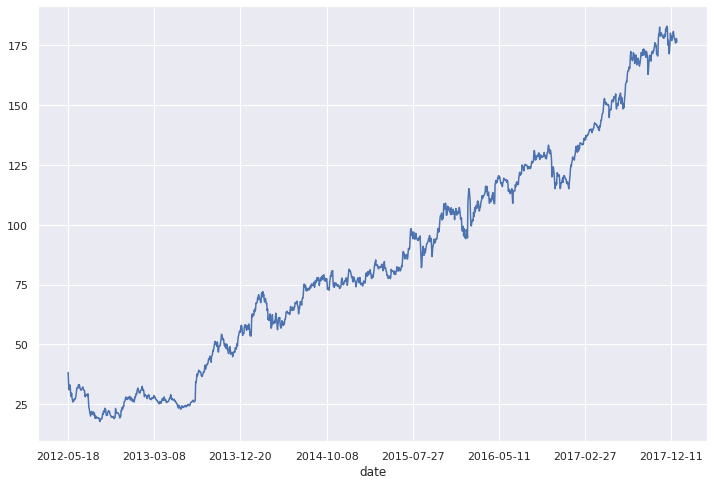

In [12]:
df['price_t'].plot(figsize = (12, 8));

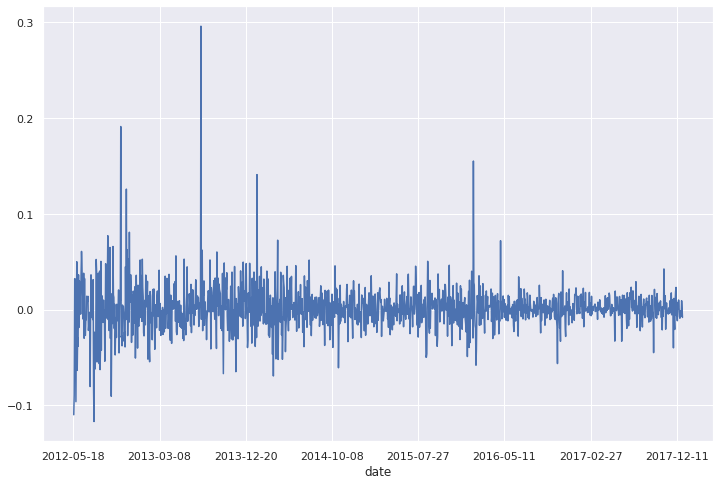

In [13]:
df['returns'].plot(figsize = (12, 8));